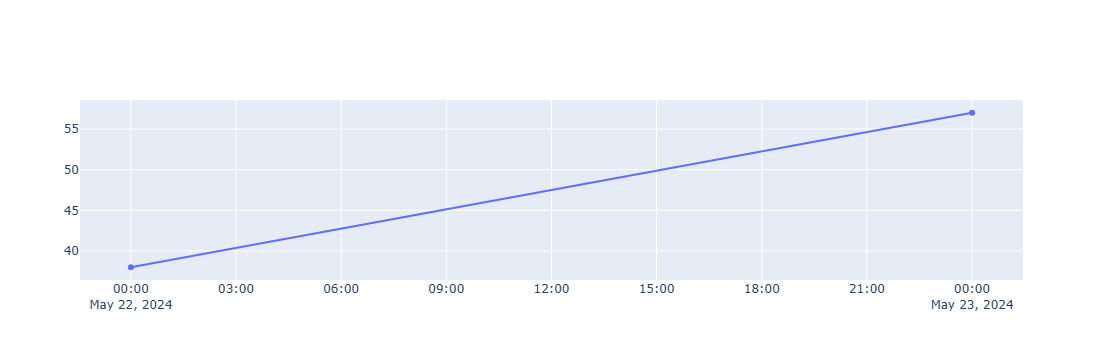

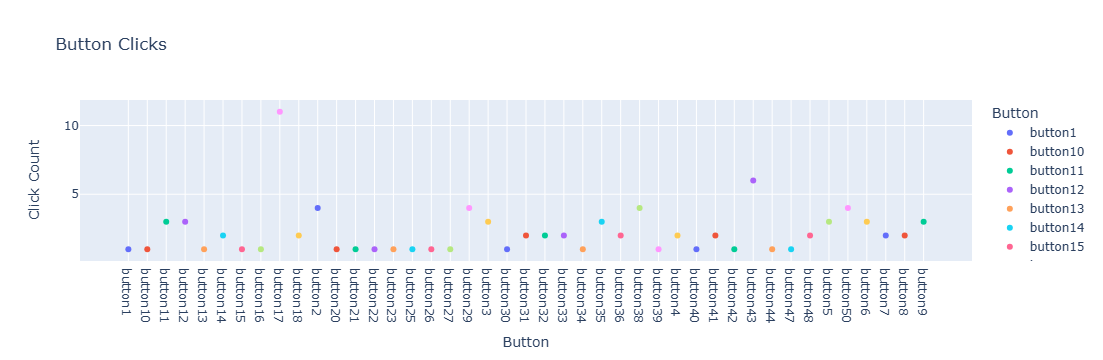

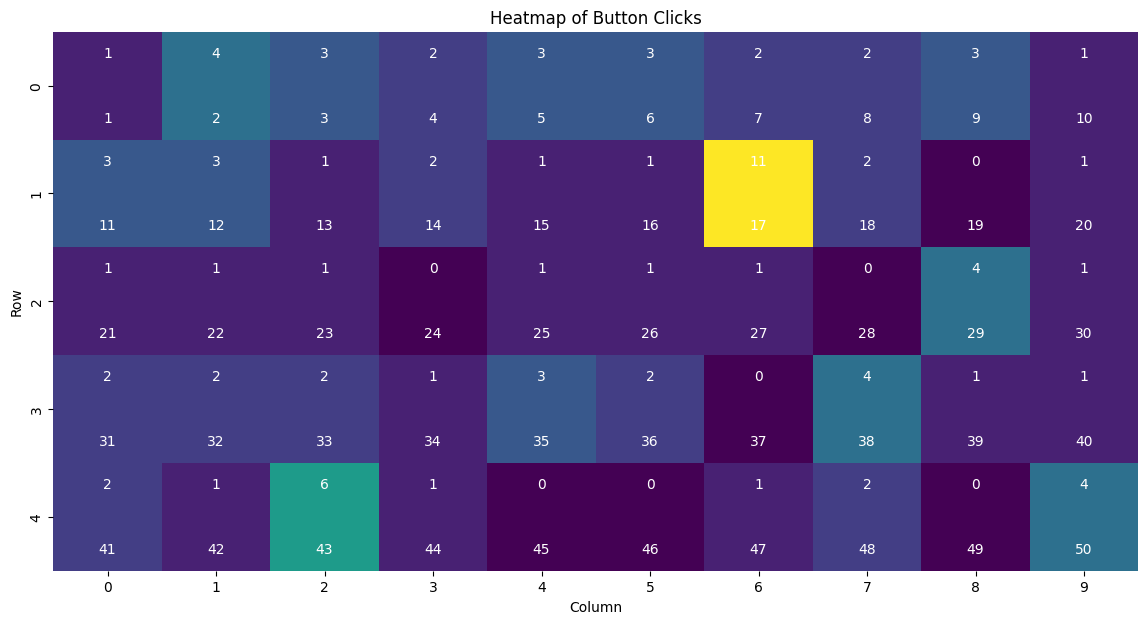

In [16]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

with open(r"C:\Users\jugal\OneDrive\Desktop\Click_Trackers\click_data.json", 'r') as f:
    click_data = [json.loads(line) for line in f]

df = pd.DataFrame(click_data)

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['date'] = df['timestamp'].dt.date

daily_clicks = df.groupby('date').size().reset_index(name='click_count')

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=daily_clicks['date'], y=daily_clicks['click_count'], mode='lines+markers', name='Click Count'))

fig1.show()

button_clicks = df.groupby('elementId').size().reset_index(name='click_count')

fig2 = px.scatter(button_clicks, x='elementId', y='click_count', color='elementId', 
                  color_discrete_sequence=px.colors.qualitative.Plotly, title='Button Clicks',
                  labels={'elementId': 'Button', 'click_count': 'Click Count'})

fig2.show()

if 'elementId' in df.columns:
    df['button_num'] = df['elementId'].str.extract('(\d+)').astype(int)
    
    heatmap_data = df['button_num'].value_counts().sort_index().reindex(range(1, 51), fill_value=0)
    heatmap_data = heatmap_data.values.reshape(5, 10)

    plt.figure(figsize=(14, 7))  
    sns.heatmap(heatmap_data, annot=False, fmt='d', cmap='viridis', cbar=False)
    
    for i in range(5):
        for j in range(10):
            button_number = i * 10 + j + 1
            click_count = heatmap_data[i, j]
            plt.text(j + 0.5, i + 0.2, str(click_count),
                     ha='center', va='center', color='white', fontsize=10)
            plt.text(j + 0.5, i + 0.8, str(button_number),
                     ha='center', va='center', color='white', fontsize=10)
    
    plt.title('Heatmap of Button Clicks')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()
else:
    print("Position data not available for heatmap.")
